# Anomaly detection

In [12]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data_cl/wholesale.csv")
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ..., 
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [15]:
from sklearn.cluster import KMeans

SSE_array = []
for i in range(1,20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0
               )

    y_km = km.fit_predict(X)
    
    SSE_array.append(km.inertia_)
    

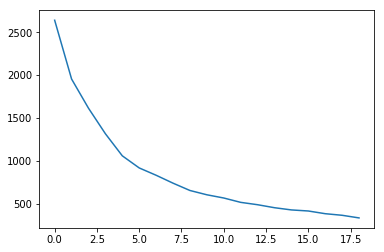

In [16]:
plt.plot(SSE_array)
plt.show()

In [17]:
km = KMeans(n_clusters=5, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0
               )
data['cluster'] = km.fit_predict(X)
data['cluster']

0      3
1      1
2      1
3      3
4      0
5      3
6      3
7      3
8      3
9      1
10     1
11     3
12     0
13     1
14     1
15     3
16     1
17     3
18     3
19     3
20     3
21     3
22     0
23     1
24     1
25     3
26     3
27     3
28     1
29     0
      ..
410    3
411    3
412    3
413    0
414    3
415    3
416    1
417    3
418    1
419    3
420    1
421    3
422    3
423    3
424    3
425    0
426    1
427    0
428    3
429    3
430    3
431    0
432    3
433    3
434    3
435    0
436    0
437    1
438    3
439    3
Name: cluster, Length: 440, dtype: int32

In [49]:
data['cluster'].value_counts()

3    271
1     95
0     63
4     10
2      1
Name: cluster, dtype: int64

In [50]:
data2 = data.loc[data['cluster'] != 2].loc[:, data.columns != 'cluster']
data2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [59]:
data2['cluster'].value_counts()

1    301
0     96
2     32
3     10
Name: cluster, dtype: int64

In [82]:
data2.loc[:, data2.columns != 'cluster']

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [83]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(data2.loc[:, data2.columns != 'cluster'])
X_pca

centers_pca = pca.transform(km.cluster_centers_)

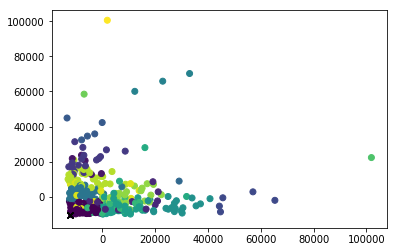

In [86]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_km)
plt.scatter(centers_pca[:,0],centers_pca[:,1], c = 'black', marker = 'x')
plt.show()

In [ ]:
#